# Algorithmic Game Theory Project

Consider a setting with an undirected graph $G=(N,E)$, where $N={1,2,…,n} \cup {s,t}$ is the `set of nodes` and `s` and `t` are `two distinguished source and target nodes`, respectively. The `objective` is to **define a path** connecting `s` and `t`, via the `nodes` in ${1,2,…,n}$ with each of them being controlled by an agent. Hereinafter, such nodes are therefore transparently viewed as the corresponding agents.

For each of the following questions, `implement` in Python a method that can provide results for any possible
graph G. Report then the results obtained over the specific graph instance depicted below

![graph](https://i.imgur.com/yNbPi80.png)

# Problem 1

Assume that **forming a path** connecting `s` and `t` leads to a `reward of 100$`. Then, compute the
`Shapley value` associated with the `agents in {1,2,…,n}` as a fair way to distribute that reward among
the agents in {1,2,…,n}, which in particular encourages cooperation.

## Solution

>**Definition (Shapley Value):** </br>
>The Shapley value is a way to redistribute the payoff obtained by the coalition among its members. The idea behind the Shapley value is to redistribute the payoff proportionally to the contribution of each player to the coalition. A possible solution consists in assigning to each player the average of all their marginal contributions over the possible orderings of the players in the coallition. That is:
>
>$$
\phi(i, v) = \frac{1}{|N|!} \sum_{\pi \in \Pi_N} v(\mathrm{B}(\pi, i) \cup \{i\}) - v(\mathrm{B}(\pi, i))
>$$

>Where: </br>
$\phi(i, v)$ is the Shapley value (i.e. the payoff) for the player $i$ </br>
$v$ is the characteristic function </br>
$\Pi_N$ is the set of all possible orderings of the elements in $N$; that is, the set of all the possible permutations of $N$ </br>
$\mathrm{B}(\pi, i)$ is the set of predecessors of $i$ in the permutation under consideration.


We can use 2 different formulas to compute `Shapley Value`:

$$
\phi(i, v) = \sum_{S \subseteq N} \frac{(|N| - |S|)! \times (|S| - 1)!}{|N|!} (v(S) - v(S \setminus \{i\}))
$$
$$
\phi(i, v) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|! \times (|N| - |S| - 1)!}{|N|!} (v(S \cup \{i\}) - v(S))
$$

It's better to start creating the initial problem configuration. 

We are considering only the agent in $N={1,2,…,n}$, so we can create a list of agents and a list of all the possible coalitions. Let's create a graph with `networkx` and add the nodes and the edges.

In [25]:
# The graph has "s" as starting node and "t" as ending node.
#s-1 s-2 
#1-3 1-4
#2-4 
#3-t
#4-t

#Create the graph using networkx
import networkx as nx
from networkx.algorithms import all_simple_paths
G = nx.DiGraph()
G.add_edge('s','1')
G.add_edge('s','2')
G.add_edge('1','3')
G.add_edge('1','4')
G.add_edge('2','4')
G.add_edge('3','t')
G.add_edge('4','t')

#Convert G to an undirected graph
G = G.to_undirected()

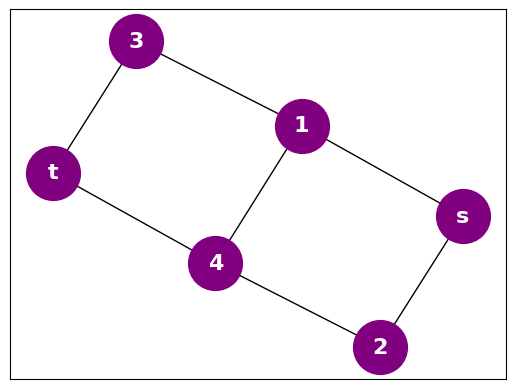

In [26]:
#Plot the graph
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G,pos, node_color='purple', node_size=1500, alpha=1)
nx.draw_networkx_edges(G,pos, width=1.0, alpha=1)
nx.draw_networkx_labels(G,pos, font_color='white', font_size=16, font_weight='bold')
plt.show()


In order to calculate the `Shapley Value`  we need to calculate the `characteristic function` $v$ for each coalition. 

To do so, we need to `generate` all the possible `coalitions` and then `calculate` the `characteristic function` for each of them. Let's take it.

In [3]:
# Get the nodes of the graph
nodes = G.nodes()

print ("Nodes of graph: ")
print (nodes)

Nodes of graph: 
['s', '1', '2', '3', '4', '5', 't']


We use `frozenset` to create the coalitions because it's an immutable object and we can use it as a key in a dictionary. Moreover, having a set is good because we can use the `set` operations

In [4]:
from itertools import combinations
def powerset(List):
    subs = [frozenset(j) for i in range(len(List)) for j in combinations(List, i + 1)]
    return subs

In [5]:
#s and t are not agents
def remove_s_t(paths):
    #if is a list of lists
    if isinstance(paths[0], list):
        for path in paths:
            path.remove('s')
            path.remove('t')
        return paths
    else:
        paths.remove('s')
        paths.remove('t')
        return paths


In [6]:
print ("All possible subsets of the graph: ")
print (list(powerset(G.nodes)))

All possible subsets of the graph: 
[frozenset({'s'}), frozenset({'1'}), frozenset({'2'}), frozenset({'3'}), frozenset({'4'}), frozenset({'5'}), frozenset({'t'}), frozenset({'s', '1'}), frozenset({'s', '2'}), frozenset({'s', '3'}), frozenset({'s', '4'}), frozenset({'s', '5'}), frozenset({'s', 't'}), frozenset({'2', '1'}), frozenset({'3', '1'}), frozenset({'4', '1'}), frozenset({'5', '1'}), frozenset({'t', '1'}), frozenset({'2', '3'}), frozenset({'4', '2'}), frozenset({'5', '2'}), frozenset({'2', 't'}), frozenset({'4', '3'}), frozenset({'5', '3'}), frozenset({'t', '3'}), frozenset({'4', '5'}), frozenset({'4', 't'}), frozenset({'5', 't'}), frozenset({'s', '2', '1'}), frozenset({'s', '3', '1'}), frozenset({'s', '4', '1'}), frozenset({'s', '5', '1'}), frozenset({'s', 't', '1'}), frozenset({'s', '2', '3'}), frozenset({'s', '4', '2'}), frozenset({'s', '5', '2'}), frozenset({'s', '2', 't'}), frozenset({'s', '4', '3'}), frozenset({'s', '5', '3'}), frozenset({'s', 't', '3'}), frozenset({'s', '4

Now, to calculate the `characteristic function`. A generla rule we can use, since in this case need to form a `path`, we can say:
$$
v(C) = \begin{cases}
100 & \text{if } \exists \text{ $C$ is a path connecting } s \text{ and } t  \\
0 & \text{otherwise}
\end{cases}
$$

So, we can use `networkx` to calculate all the possible `simple paths` between `s` and `t` and then check if the coalition is in the path. If it is, then the characteristic function is 100, otherwise is 0.

In [7]:

def find_all_paths(graph, start, end):
    #use the networkx function all_simple_paths
    return list(all_simple_paths(graph, start, end))

print ("All possible paths from s to t: ")

print (f"\033[91m{find_all_paths(G, 's', 't')}")

All possible paths from s to t: 
[['s', '1', '3', 't'], ['s', '1', '4', 't'], ['s', '1', '5', '4', 't'], ['s', '2', '4', '1', '3', 't'], ['s', '2', '4', 't'], ['s', '2', '4', '5', '1', '3', 't']]


Let's just calculate the characteristic function for each coalition and store it in a dictionary.

sScriveere nel repo perché se usiamo i path senza senza considerare i superset come effetivamente funzionanti allora ci sono problemi con lo shap

In [8]:
v = {}
paths = find_all_paths(G, 's', 't')
paths = remove_s_t(paths)

#We remove s and t from the nodes because they are not agents
nodes = remove_s_t(list(G.nodes()))


#Set to 0 for all powersets
for i in list(powerset(nodes)):
    flag = False
    for p in paths:
        if i.issuperset(frozenset(p)):
            flag = True
            break
    
    if flag:
        v[i] = 100
        continue
        
    v[i] = 0


#Set to 100 for all paths
for i in paths:
    v[frozenset(i)] = 100



print ("The value of the game for each subset is: ")

for i in v:
    print (f"{i, v[i]}")

The value of the game for each subset is: 
(frozenset({'1'}), 0)
(frozenset({'2'}), 0)
(frozenset({'3'}), 0)
(frozenset({'4'}), 0)
(frozenset({'5'}), 0)
(frozenset({'2', '1'}), 0)
(frozenset({'3', '1'}), 100)
(frozenset({'4', '1'}), 100)
(frozenset({'5', '1'}), 0)
(frozenset({'2', '3'}), 0)
(frozenset({'4', '2'}), 100)
(frozenset({'5', '2'}), 0)
(frozenset({'4', '3'}), 0)
(frozenset({'5', '3'}), 0)
(frozenset({'4', '5'}), 0)
(frozenset({'3', '2', '1'}), 100)
(frozenset({'4', '2', '1'}), 100)
(frozenset({'5', '2', '1'}), 0)
(frozenset({'4', '3', '1'}), 100)
(frozenset({'5', '3', '1'}), 100)
(frozenset({'4', '5', '1'}), 100)
(frozenset({'4', '2', '3'}), 100)
(frozenset({'5', '2', '3'}), 0)
(frozenset({'4', '2', '5'}), 100)
(frozenset({'4', '5', '3'}), 0)
(frozenset({'4', '3', '2', '1'}), 100)
(frozenset({'5', '3', '2', '1'}), 100)
(frozenset({'4', '5', '2', '1'}), 100)
(frozenset({'5', '4', '3', '1'}), 100)
(frozenset({'4', '5', '2', '3'}), 100)
(frozenset({'5', '1', '4', '2', '3'}), 100

Now we can use the `Shapley Value` formula to calculate the payoff for each agent.

In [9]:
from math import factorial

def shapley_value(player, characteristic_function):
    player_list = max(characteristic_function)
    player = set(player)
    N = len(player_list)
    coalitions = powerset(player_list)
    shapley_val = 0
    for coalition in coalitions:
        S = len(coalition)
        marginal_contribution = characteristic_function[coalition] - (characteristic_function[coalition - player] if len(coalition - player) > 0 else 0)
        shapley_val += ((factorial(N - S) * factorial(S - 1)) / factorial(N)) * marginal_contribution
    return shapley_val

def shapley(characteristic_function):
    return {player: shapley_value(player, characteristic_function) for player in max(characteristic_function)}

In [10]:
print ("The Shapley value for each player is: ")
print (shapley(v))

The Shapley value for each player is: 
{'5': 0.0, '1': 33.33333333333333, '4': 33.33333333333333, '2': 16.666666666666668, '3': 16.666666666666668}


We just got the payoff for each agent. This is feasible because we have a small number of agents. What happens if we have a lot of agents? Let's see.

In [11]:
# Generate a big random graph, having s and t as starting and ending nodes
import random
random.seed(42)
G2 = nx.gnm_random_graph(10, 20, seed=42, directed=False)

print ("The graph has the following nodes: ")
print (list(G2.nodes()))

# Add 's' and 't' as starting and ending nodes
G2.add_node('s')
G2.add_node('t')

# Get all nodes except 's' and 't'
nodes = list(G2.nodes())
nodes.remove('s')
nodes.remove('t')

# Add edges from 's' to 2 random nodes
G2.add_edge('s', random.choice(nodes))
G2.add_edge('s', random.choice(nodes))

# Add edges from 2 random nodes to 't'
G2.add_edge(random.choice(nodes), 't')
G2.add_edge(random.choice(nodes), 't')

# Convert node labels from integer to string
G2 = nx.relabel_nodes(G2, lambda x: str(x)) # type: ignore



The graph has the following nodes: 
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


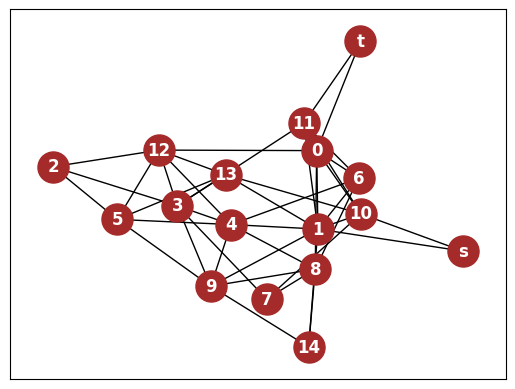

In [12]:
#Plot the graph
pos = nx.spring_layout(G2, seed=42)
nx.draw_networkx_nodes(G2,pos, node_color='brown', node_size=500, alpha=1)
nx.draw_networkx_edges(G2,pos, width=1.0, alpha=1)
nx.draw_networkx_labels(G2,pos, font_color='white', font_size=12, font_weight='bold')
plt.show()

This is a very big number of nodes. Let's see how much time it takes to calculate the payoff for each agent.

In [13]:
#Find all paths from s to t
paths = find_all_paths(G2, 's', 't')

#Remove s and t from the paths
paths = remove_s_t(paths)

#Remove s and t from the nodes
nodes = remove_s_t(list(G2.nodes()))

In [14]:
#Set to 0 for all powersets
v2 = {}
#Set to 0 for all powersets
for i in list(powerset(nodes)):
    flag = False
    for p in paths:
        if i.issuperset(frozenset(p)):
            flag = True
            break
    
    if flag:
        v2[i] = 100
        continue
        
    v2[i] = 0


#Set to 100 for all paths
for i in paths:
    v2[frozenset(i)] = 100
    
#Print the value of the game for each subset
print ("The value of the game for each subset is: ")

for i in v2:
    print (f"{i, v2[i]}")

KeyboardInterrupt: 

In [ ]:
#Just for curiosyty
print(f"The number of subsets is: {len(v2)}")

The number of subsets is: 1023


In [ ]:
#Print the Shapley value for each player
print ("The Shapley value for each player is: ")
shap = shapley(v2)

print(shap)
print(sum(shap.values()))
    

The Shapley value for each player is: 
{'8': 1.6666666666666663, '0': 23.333333333333332, '5': 1.6666666666666663, '1': 23.333333333333332, '9': 1.6666666666666663, '4': 23.333333333333332, '7': 0.0, '3': 23.333333333333332, '6': 1.6666666666666663, '2': 0.0}
100.0


# DA CAPIRE COSA SUCCEDE
Ho un valore negativo, con 10 nodi. Se metto 30 nodi diventa lentissimo e sopratutto ci sono tantissimi valori negativi

# Problem 2
Assume that each agent in ${1,2…,n}$ might `freely decide` whether to provide `her/his contribution` to connect s and t.
Assume, in particular, that each agent is `willing to contribute` only if at most two of
her/his neighbors do so.
$$
n_i = \begin{cases}
Collaborate & \text{if } |N_i| \leq 2 \\
Not Collaborate & \text{otherwise}
\end{cases}
$$
having $N_i$ the set of neighbors of $i$.

Then, check whether the resulting setting admits a pure Nash equilibrium and compute one, if any.

# Solution 2

We have to think about the fact that `each agent` wants to `contribute` only if `at most two of her/his neighbors do so`. So, for each node, we have to check if the number of neighbors that want to contribute is less or equal than 2. If it is, then the node will contribute, otherwise it will not.

Maybe we can create a list containing all the with less than 3 neighbors that want to contribute. All of those will contribute. Then we will later think about how we can do for the other nodes.


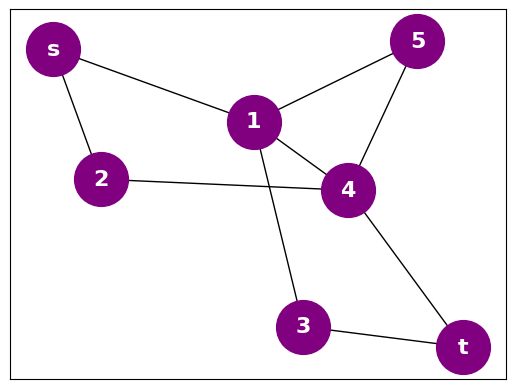

In [15]:
#Use the old graph

#Plot the graph
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G,pos, node_color='purple', node_size=1500, alpha=1)
nx.draw_networkx_edges(G,pos, width=1.0, alpha=1)
nx.draw_networkx_labels(G,pos, font_color='white', font_size=16, font_weight='bold')
plt.show()

In [16]:
def get_contribution_and_choose(G: nx.Graph):
    to_choose = []

    #Remove the nodes with degree less than 3 from the list
    for i in G.nodes():
        if G.degree(i) > 2:
            to_choose.append(i)

    contribute = list(G.nodes() - to_choose)

    return contribute, to_choose



The nodes that will surely contribute are: 
['5', '2', 's', 't', '3']
The nodes that have to choose: 
['1', '4']


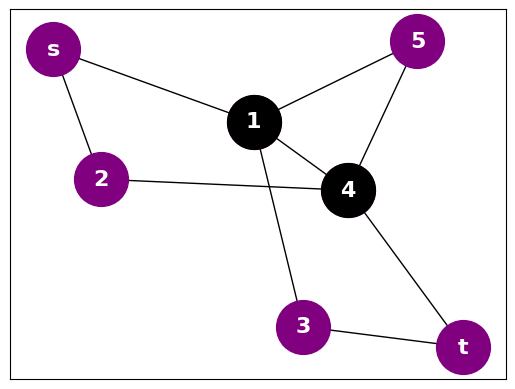

In [17]:
contribute, to_choose = get_contribution_and_choose(G)

#Print the nodes with degree less than 3
print ("The nodes that will surely contribute are: ")
print (contribute)

print ("The nodes that have to choose: ")
print (to_choose)


#Print in the graph the to_choose with degree less than 3 and make them blue
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G,pos, node_color='purple', node_size=1500, alpha=1)
nx.draw_networkx_nodes(G,pos, nodelist=to_choose, node_color='black', node_size=1500, alpha=1)
nx.draw_networkx_edges(G,pos, width=1.0, alpha=1)
nx.draw_networkx_labels(G,pos, font_color='white', font_size=16, font_weight='bold')
plt.show()

What is the `Nash Equilibrium`? It's a `strategy profile` in which `no player` can `benefit` by `changing` her/his `strategy` while the `other players` keep `their strategies` unchanged.
So, in this case, we have the nodes $1$ and $4$ with more than 2 neighbors. But, if $1$ decides to contribute, then $4$ will not contribute. If $4$ decides to contribute, then $1$ will not contribute. So, we have a `Nash Equilibrium`. But how can I find it in an algorithmic way?

I think we can work in this way:

- We have a `list of nodes`
  - We `check` if the node has `less than 3 neighbors` that want to `contribute`
    - If `it has`, then we `add` it to a list of `nodes that will contribute`
    - If it **`has not`**:
      - We `add` the node to a list of `nodes that can choose`
      - We `check` if the node has a `neighbors that can choose`:
        - If `it has`, then we `create a solution` for `each of the possible choices`
        - If `**it has not**`, then we set it to `not contribute` 

In [18]:
import numpy as np
#Let's implement what I wrote here
print(f"The nodes with degree more than 2 are: {to_choose}")

#Let's see if the nodes inside the to_choose have a naive choice (ie. if they can easily contribute without any other calculation)
#This is true if the number of neighbors of the node insdie the contribute set is less than 2

for i in to_choose:
    count = 0
    for j in contribute:
        if G.has_edge(i, j):
            count += 1
    if count < 2:
        print (f"The node {i} has a naive choice")
    else:
        print (f"The node {i} has not a naive choice")


The nodes with degree more than 2 are: ['1', '4']
The node 1 has not a naive choice
The node 4 has not a naive choice


If so, I may have an idea.

All the possible solutions are made by the number of `permutations` of the `nodes that can choose`. So, we can `generate` all the `permutations` of the `nodes that can choose` and then `generate` a `solution` for each of them.

Example:

I have the nodes $1, 2, 3, 4, 5$. 
$$
\begin{align}
&\text{Nodes that will contribute: } \{1, 2, 3\} \\
&\text{Nodes that can choose: } \{4, 5\}
\end{align}
$$

Now, I know that all nodes want to collaborate, having a number of neighbors that want to collaborate less than 3. So, knowing that, I can generate all the possible permutations of the nodes that can choose and then `verify` if the `solution` is `feasible` or not.

Why do I need to verify? Because I can have that nodes $4$ and $5$ are nodes that can choose, but only one of them can collaborate. If $4$ and $5$ are not connected, then I can have that both of them can collaborate. But if they are connected, then only one of them can collaborate.

Let's see if this works.


In [19]:
import itertools

def all_combinations(nodes):
    result = []
    for combination in itertools.product([True, False], repeat=len(nodes)):
        result.append(dict(zip(nodes, combination)))
    return result

In [20]:
print ("All possible permutations of the nodes with degree less than 3: ")
combination_solution = all_combinations(to_choose)
print (combination_solution)

All possible permutations of the nodes with degree less than 3: 
[{'1': True, '4': True}, {'1': True, '4': False}, {'1': False, '4': True}, {'1': False, '4': False}]


In [21]:

def get_solution(contribute, combination_solution):
    solutions = dict()
    for i in range(len(combination_solution)):
        solutions[i] = {
            "in" : contribute.copy(),
            "out" : []
        }
        for j in combination_solution[i]:
            if combination_solution[i][j]:
                solutions[i]["in"].append(j)
            else:
                solutions[i]["out"].append(j)
    return solutions
    

print ("All possible solutions: ")
solutions = get_solution(contribute, combination_solution)
for i in solutions:
    print (f"{i} :{solutions[i]}")


All possible solutions: 
0 :{'in': ['5', '2', 's', 't', '3', '1', '4'], 'out': []}
1 :{'in': ['5', '2', 's', 't', '3', '1'], 'out': ['4']}
2 :{'in': ['5', '2', 's', 't', '3', '4'], 'out': ['1']}
3 :{'in': ['5', '2', 's', 't', '3'], 'out': ['1', '4']}


In [22]:
solutions = get_solution(contribute, combination_solution)

print ("All possible solutions: ")
print (solutions)

All possible solutions: 
{0: {'in': ['5', '2', 's', 't', '3', '1', '4'], 'out': []}, 1: {'in': ['5', '2', 's', 't', '3', '1'], 'out': ['4']}, 2: {'in': ['5', '2', 's', 't', '3', '4'], 'out': ['1']}, 3: {'in': ['5', '2', 's', 't', '3'], 'out': ['1', '4']}}


In [23]:
#Now, let's check if the solutions are acceptable
#A solution is acceptable, speaking of the to_choose nodes if:
#1) The nodes are in the in list and the number of neighbors in the in list is less than 3
#2) The nodes are in the out list and the number of neighbors in the in list is greater than 2

def is_acceptable_solution(solution, to_choose, G):
    acceptable_solutions = dict()
    for i in solutions:
        #For each node in the in to_choose list
        flag = True
        for n in to_choose:
            #If the node is in the in list
            if n in solutions[i]["in"]:
                #If the number of neighbors in the in list is less than 3
                if len([x for x in G.neighbors(n) if x in solutions[i]["in"]]) > 2:
                    flag = False
                    break
            #If the node is in the out list
            else:
                #If the number of neighbors in the in list is greater than 2
                if len([x for x in G.neighbors(n) if x in solutions[i]["in"]]) < 3:
                    flag = False
                    break
        if flag:
            acceptable_solutions[i] = solutions[i]
    return acceptable_solutions

print ("All acceptable solutions: ")    
acceptable_solutions = is_acceptable_solution(solutions, to_choose, G)
for i in acceptable_solutions:
    print (f"{i} :{acceptable_solutions[i]}")

All acceptable solutions: 
3 :{'in': ['5', '2', 's', 't', '3'], 'out': ['1', '4']}


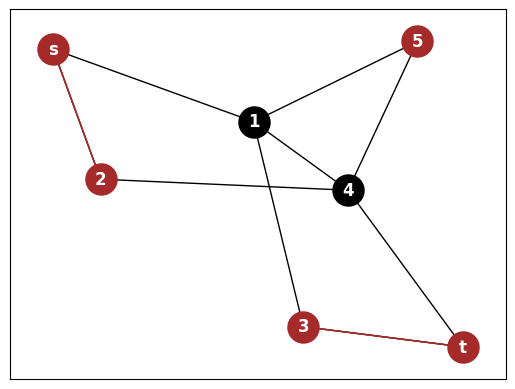

In [24]:

for i in acceptable_solutions:
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G,pos, nodelist=acceptable_solutions[i]["in"], node_color='brown', node_size=500, alpha=1)
    nx.draw_networkx_nodes(G,pos, nodelist=acceptable_solutions[i]["out"], node_color='black', node_size=500, alpha=1)
    nx.draw_networkx_edges(G,pos, width=1.0, alpha=1)
    nx.draw_networkx_labels(G,pos, font_color='white', font_size=12, font_weight='bold')
    for n in acceptable_solutions[i]["in"]:
        nx.draw_networkx_edges(G,pos, edgelist=[(n, x) for x in G.neighbors(n) if x in acceptable_solutions[i]["in"]], width=1.0, alpha=1, edge_color='brown')
    plt.show()

So, in this way, we can generate all the possible solutions using a combination of the nodes that can choose. This seems to work, I don't know if it's the best way to do it, but it works.

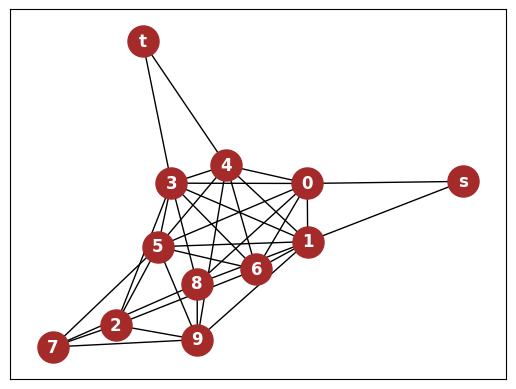

In [ ]:
#Let's try with a bigger graph
#We will use G2

pos = nx.spring_layout(G2, seed=42)
nx.draw_networkx_nodes(G2,pos, node_color='brown', node_size=500, alpha=1)
nx.draw_networkx_edges(G2,pos, width=1.0, alpha=1)
nx.draw_networkx_labels(G2,pos, font_color='white', font_size=12, font_weight='bold')
plt.show()



In [ ]:
contribute, to_choose = get_contribution_and_choose(G2)

print ("The nodes that will surely contribute are: ")
print (contribute)

print ("The nodes that have to choose: ")
print (to_choose)

The nodes that will surely contribute are: 
['t', 's']
The nodes that have to choose: 
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
print(f"All possible permutations of the nodes with degree less than 3: ")
combination_solution = all_combinations(to_choose)
print (combination_solution)

All possible permutations of the nodes with degree less than 3: 
[{'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': True, '8': True, '9': True}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': True, '8': True, '9': False}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': True, '8': False, '9': True}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': True, '8': False, '9': False}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': False, '8': True, '9': True}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': False, '8': True, '9': False}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': False, '8': False, '9': True}, {'0': True, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': False, '8': False, '9': False}, {'0': True, '1': True, '2'

In [ ]:
print ("All possible solutions: ")
solutions = get_solution(contribute, combination_solution)
for i in solutions:
    print (f"{i} :{solutions[i]}")

All possible solutions: 
0 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 'out': []}
1 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '7', '8'], 'out': ['9']}
2 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '7', '9'], 'out': ['8']}
3 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '7'], 'out': ['8', '9']}
4 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '8', '9'], 'out': ['7']}
5 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '8'], 'out': ['7', '9']}
6 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6', '9'], 'out': ['7', '8']}
7 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '6'], 'out': ['7', '8', '9']}
8 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '7', '8', '9'], 'out': ['6']}
9 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '7', '8'], 'out': ['6', '9']}
10 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '7', '9'], 'out': ['6', '8']}
11 :{'in': ['t', 's', '0', '1', '2', '3', '4', '5', '7'], 'out': ['6', '8', '9']}

In [ ]:
print ("All acceptable solutions: ")
acceptable_solutions = is_acceptable_solution(solutions, to_choose, G2)
for i in acceptable_solutions:
    print (f"{i} :{acceptable_solutions[i]}")

All acceptable solutions: 
123 :{'in': ['t', 's', '0', '1', '2', '7'], 'out': ['3', '4', '5', '6', '8', '9']}
498 :{'in': ['t', 's', '0', '6', '7', '9'], 'out': ['1', '2', '3', '4', '5', '8']}
845 :{'in': ['t', 's', '2', '4', '5', '8'], 'out': ['0', '1', '3', '6', '7', '9']}
849 :{'in': ['t', 's', '2', '4', '6', '7', '8'], 'out': ['0', '1', '3', '5', '9']}
869 :{'in': ['t', 's', '2', '5', '6', '8'], 'out': ['0', '1', '3', '4', '7', '9']}
884 :{'in': ['t', 's', '2', '6', '8', '9'], 'out': ['0', '1', '3', '4', '5', '7']}
946 :{'in': ['t', 's', '3', '6', '7', '9'], 'out': ['0', '1', '2', '4', '5', '8']}
993 :{'in': ['t', 's', '5', '6', '7', '8'], 'out': ['0', '1', '2', '3', '4', '9']}
996 :{'in': ['t', 's', '5', '6', '8', '9'], 'out': ['0', '1', '2', '3', '4', '7']}
1008 :{'in': ['t', 's', '6', '7', '8', '9'], 'out': ['0', '1', '2', '3', '4', '5']}


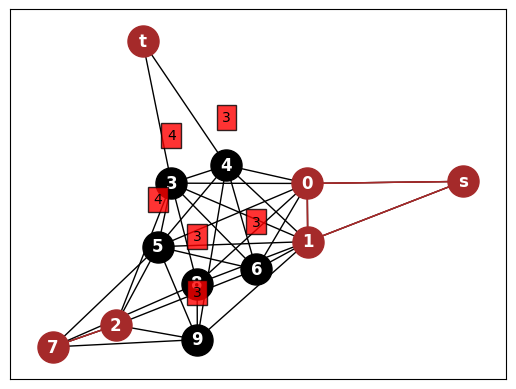

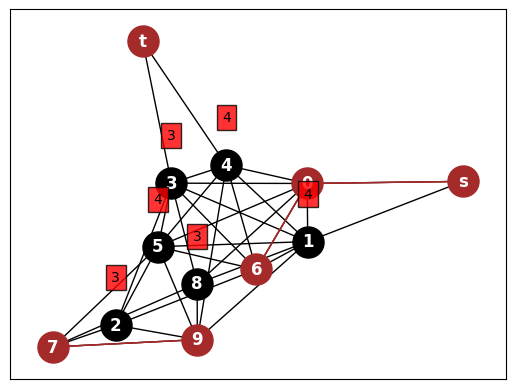

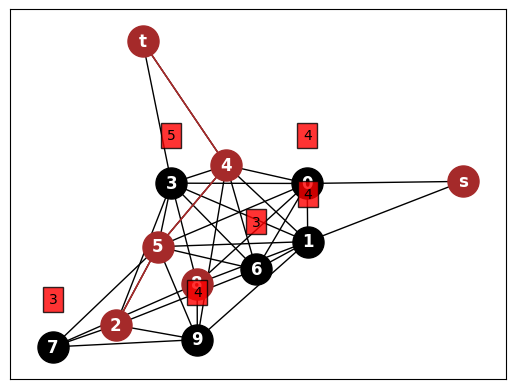

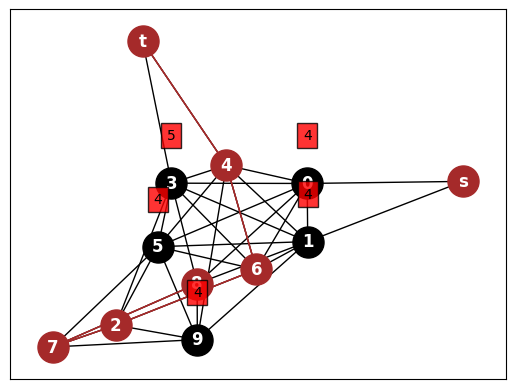

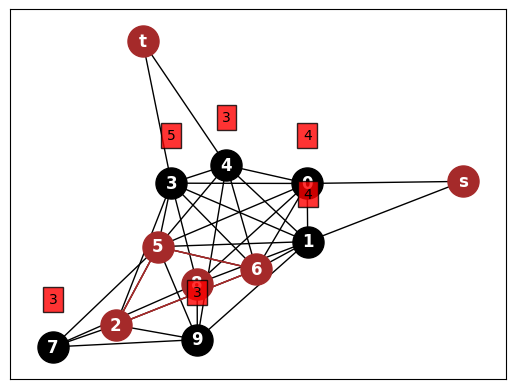

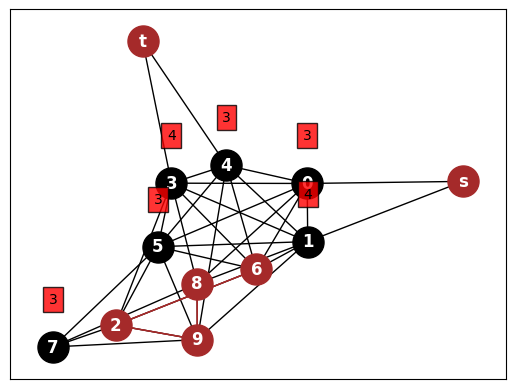

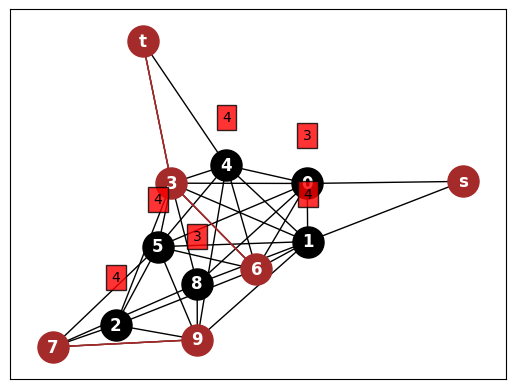

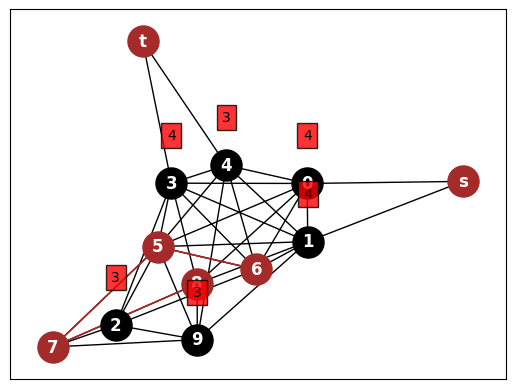

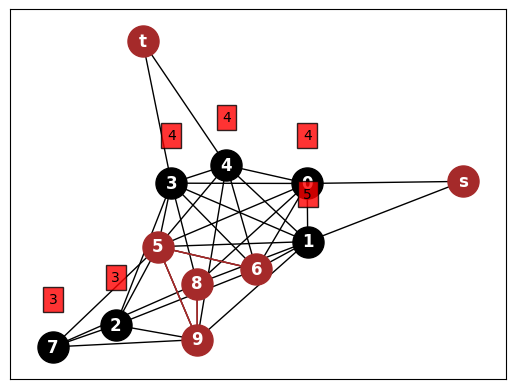

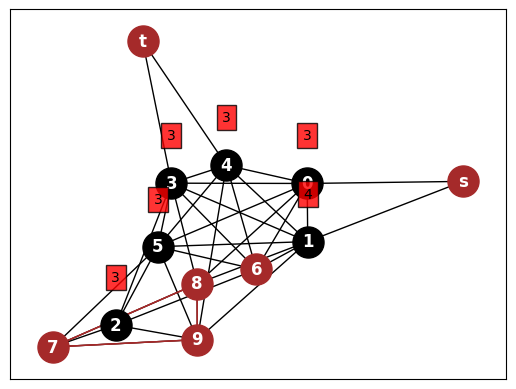

In [ ]:
for i in acceptable_solutions:
    pos = nx.spring_layout(G2, seed=42)
    nx.draw_networkx_nodes(G2,pos, nodelist=acceptable_solutions[i]["in"], node_color='brown', node_size=500, alpha=1)
    nx.draw_networkx_nodes(G2,pos, nodelist=acceptable_solutions[i]["out"], node_color='black', node_size=500, alpha=1)
    nx.draw_networkx_edges(G2,pos, width=1.0, alpha=1)
    nx.draw_networkx_labels(G2,pos, font_color='white', font_size=12, font_weight='bold')
    #draw the edges of the in nodes in green
    for n in acceptable_solutions[i]["in"]:
        nx.draw_networkx_edges(G2,pos, edgelist=[(n, x) for x in G2.neighbors(n) if x in acceptable_solutions[i]["in"]], width=1.0, alpha=1, edge_color='brown')

    for n in acceptable_solutions[i]["out"]:
        plt.text(pos[n][0], pos[n][1] + 0.2, len([x for x in G2.neighbors(n) if x in acceptable_solutions[i]["in"]]), bbox=dict(facecolor='red', alpha=0.8), horizontalalignment='center')

    plt.show()